## Data Reading and preprocessing.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
reccom_df=pd .read_csv("D:\\PYTHON_MAIN_COURSE(IIIT-Bnglr)\\COURSE-6 -E-COMMERCE\\assignment\\beer_data.csv")

In [3]:
reccom_df.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [4]:
reccom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475984 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475984 non-null int64
review_profilename    475884 non-null object
review_overall        475984 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ MB


In [5]:
round(reccom_df.isnull().sum()/len(reccom_df)*100,2)

beer_beerid           0.00
review_profilename    0.02
review_overall        0.00
dtype: float64

In [6]:
#there are 100 reviewer names missing from the data which is .02% of the total 
##so it can be dropped without harming our data

In [7]:
reccom_df = reccom_df.dropna()

In [8]:
reccom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475884 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           475884 non-null int64
review_profilename    475884 non-null object
review_overall        475884 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


In [9]:
round(reccom_df.isnull().sum()/len(reccom_df)*100,2)

beer_beerid           0.0
review_profilename    0.0
review_overall        0.0
dtype: float64

### All the null values are taken care off.

In [10]:
#checkin duplicates on beer_beerid','review_profilename' columns
reccom_df.duplicated(['beer_beerid','review_profilename']).sum()

1422

In [11]:
## Now dropping the duplicated values
reccom_df = reccom_df.drop_duplicates(['beer_beerid','review_profilename'],keep='first')

In [12]:
reccom_df.shape

(474462, 3)

In [13]:
reccom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474462 entries, 0 to 475983
Data columns (total 3 columns):
beer_beerid           474462 non-null int64
review_profilename    474462 non-null object
review_overall        474462 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.5+ MB


In [14]:
reccom_df.dtypes

beer_beerid             int64
review_profilename     object
review_overall        float64
dtype: object

In [15]:
reccom_df.review_overall.describe()

count    474462.000000
mean          3.814274
std           0.720484
min           0.000000
25%           3.500000
50%           4.000000
75%           4.500000
max           5.000000
Name: review_overall, dtype: float64

In [16]:
reccom_df.review_overall .value_counts()

4.0    174240
4.5     96937
3.5     90578
3.0     49426
5.0     27037
2.5     17557
2.0     11587
1.5      3810
1.0      3284
0.0         6
Name: review_overall, dtype: int64

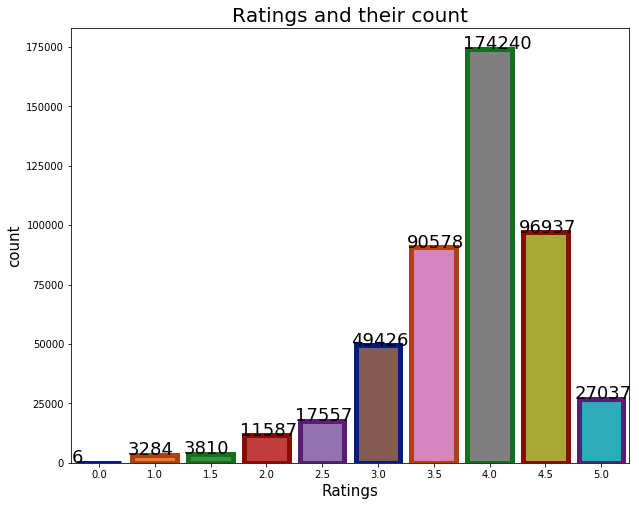

In [17]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="review_overall", data=reccom_df , 
linewidth=5,edgecolor=sns.color_palette("dark", 5))
plt.ylabel("count",fontsize=15)
plt.xlabel("Ratings",fontsize=15)
plt.title("Ratings and their count",fontsize=20)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.08, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=18, color='black',
                rotation=0)
plt.show()

### Max ratings are given between 3.5-4.5.

<Figure size 1440x1440 with 0 Axes>

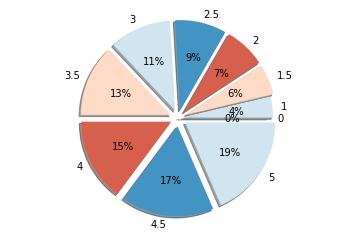

<Figure size 1440x1440 with 0 Axes>

In [18]:
plt.figure(figsize=(20,20))

labels =(['0','1','1.5','2','2.5','3','3.5','4','4.5','5'])
#count each type

zero = len(reccom_df[(reccom_df['review_overall']==0)])
one = len(reccom_df[(reccom_df['review_overall']==1)])
tw0 = len(reccom_df[(reccom_df['review_overall']==1.5)])
two= len(reccom_df[(reccom_df['review_overall']==2)])
two_andahalf = len(reccom_df[(reccom_df['review_overall']==2.5)])
three = len(reccom_df[(reccom_df['review_overall']==3)])
threeandahalf = len(reccom_df[(reccom_df['review_overall']==3.5)])
four = len(reccom_df[(reccom_df['review_overall']==4)])
fourandahalf = len(reccom_df[(reccom_df['review_overall']==4.5)])
five = len(reccom_df[(reccom_df['review_overall']==5)])


sizes = [0,1,1.5,2,2.5,3,3.5,4,4.5,5]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = [0,0.05,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09]
fig1, ax1 = plt.subplots()

colors = sns.color_palette("RdBu_r", n_colors=4)
plt.figure(figsize=(20,20))

ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', colors=colors,shadow=True, startangle=0)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

## Data Preparation and Processing.

In [19]:
reccom_df['beer_beerid'].nunique()

40304

 There are 40304 unique beers in the dataset.

In [20]:
round(reccom_df['beer_beerid'].nunique()/len(reccom_df)*100,2)

8.49

which is roughly 8.5 % of total dataset.

In [21]:
reccom_df.beer_beerid.value_counts().sort_values(ascending=False)[:6]

2093    977
412     966
1904    902
1093    840
92      812
4083    798
Name: beer_beerid, dtype: int64

###  beer_id 2093 has the highest reviews of 977

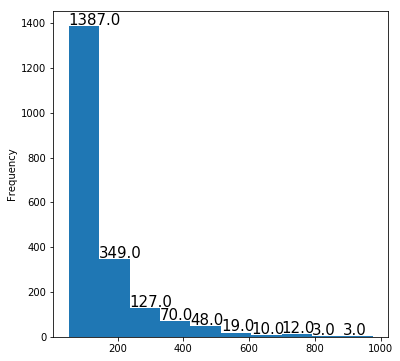

In [22]:
plt.figure(figsize=(6,6))
ax_1=reccom_df['beer_beerid'].value_counts()[reccom_df['beer_beerid'].value_counts()>50].plot.hist(bins=10)
for i in ax_1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_1.text(i.get_x()-.08, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()


### Majority of beers have 0-100 reviews

In [23]:
len(reccom_df['beer_beerid'].value_counts()[reccom_df['beer_beerid'].value_counts()>50])


2028

In [24]:
round(len(reccom_df['beer_beerid'].value_counts()[reccom_df['beer_beerid'].value_counts()>50])/len(reccom_df)*100,2)


0.43

### Almost 0.45% of beers have more than 50 reviews

In [25]:
avg_ratings = reccom_df.groupby('beer_beerid').mean().sort_values('review_overall',ascending = False).reset_index()
avg_ratings.head()

,beer_beerid,review_overall
0,66421,5.0
1,53127,5.0
2,25990,5.0
3,3681,5.0
4,26130,5.0


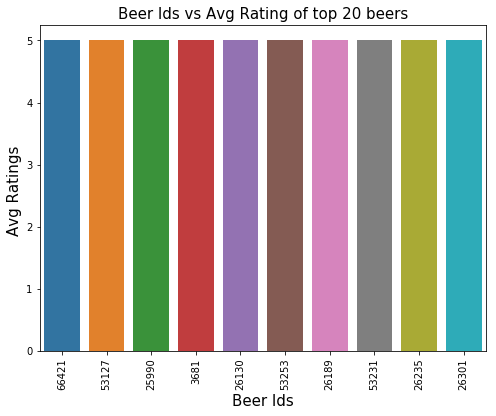

In [26]:
plt.figure(figsize = (8,6))
ax = sns.barplot(x = 'beer_beerid', y = 'review_overall', data = avg_ratings.head(10), order = avg_ratings['beer_beerid'].head(10))
plt.xlabel("Beer Ids",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Avg Ratings ",fontsize=15)
plt.title("Beer Ids vs Avg Rating of top 20 beers",fontsize=15)
plt.show()

## Top 15 beerids.

In [27]:
reccom_df_1=reccom_df.loc[reccom_df['review_overall'] == 5]

In [28]:
reccom_df_1['beer_beerid'].value_counts()[:10]

7971     337
731      196
1545     196
17112    180
1093     170
695      162
19960    162
645      145
15881    144
11757    137
Name: beer_beerid, dtype: int64

#### Beer id 7971 received  highest times the rating of 5.

In [29]:
count_ratings_reviewer = reccom_df.groupby('review_profilename').count().sort_values('review_overall',ascending = False).reset_index()
count_ratings_reviewer.head()

,review_profilename,beer_beerid,review_overall
0,northyorksammy,1842,1842
1,mikesgroove,1373,1373
2,BuckeyeNation,1336,1336
3,Thorpe429,1072,1072
4,ChainGangGuy,1046,1046


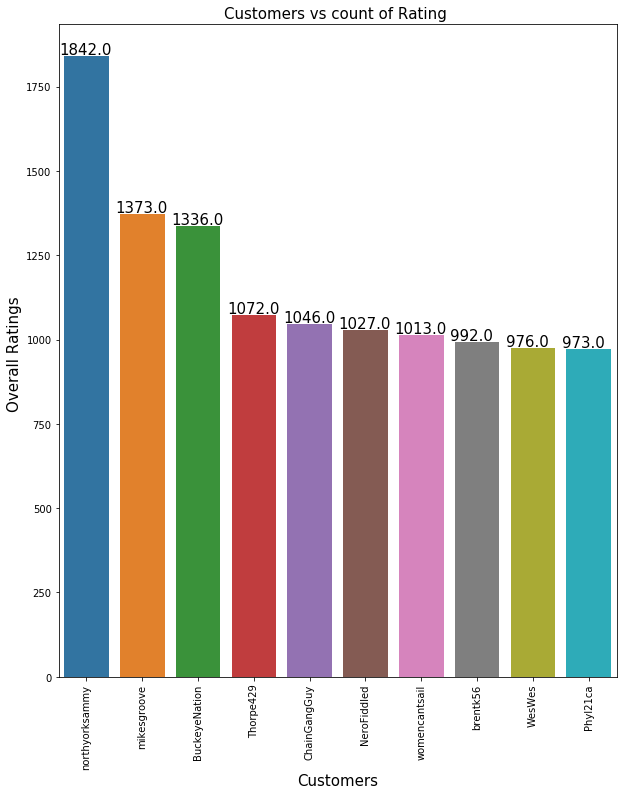

In [30]:
plt.figure(figsize = (10,12))
ax_1 = sns.barplot(x = 'review_profilename', y = 'review_overall', data = count_ratings_reviewer.head(10), 
                 order = count_ratings_reviewer['review_profilename'].head(10))
for i in ax_1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_1.text(i.get_x()-.08, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.xlabel("Customers",fontsize=15)
plt.xticks(rotation=90)
plt.ylabel("Overall Ratings ",fontsize=15)
plt.title("Customers vs count of Rating ",fontsize=15)
plt.show()

### Top 10 customers who  gave their feedback max times.

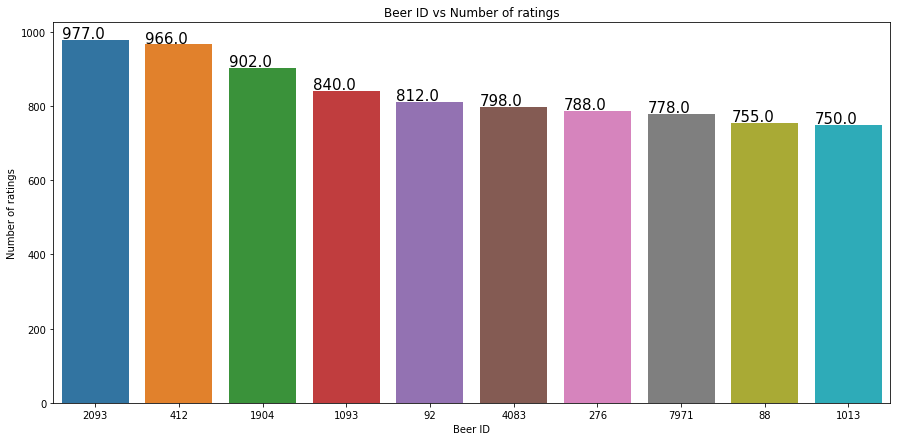

In [31]:
plt.figure(figsize = (15,7))
df_rating_count = reccom_df.groupby('beer_beerid').count().sort_values('review_overall',ascending = False).reset_index().head(10)
ax_1 = sns.barplot(x = 'beer_beerid', y = 'review_overall', data = df_rating_count, order = df_rating_count['beer_beerid'])
for i in ax_1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_1.text(i.get_x()-0, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.xlabel('Beer ID')
plt.ylabel('Number of ratings')
plt.title('Beer ID vs Number of ratings')

plt.show()


### Beers ids which got feedback maximum times.

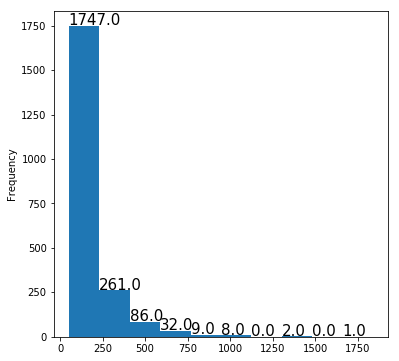

In [32]:
plt.figure(figsize=(6,6))
ax_1=reccom_df['review_profilename'].value_counts()[reccom_df['review_profilename'].value_counts()>50].plot.hist(bins=10)
for i in ax_1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_1.text(i.get_x()-.08, i.get_height()+5, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)
plt.show()


In [33]:
avg_ratings_reviewer = reccom_df.groupby('review_profilename').mean().sort_values('review_overall',ascending = False).reset_index()
avg_ratings_reviewer.head()

,review_profilename,beer_beerid,review_overall
0,zzajjber,2270.0,5.0
1,heartofgold,7971.0,5.0
2,guinness72384,1160.0,5.0
3,gtochld11,1790.0,5.0
4,DogfishDave,8322.0,5.0


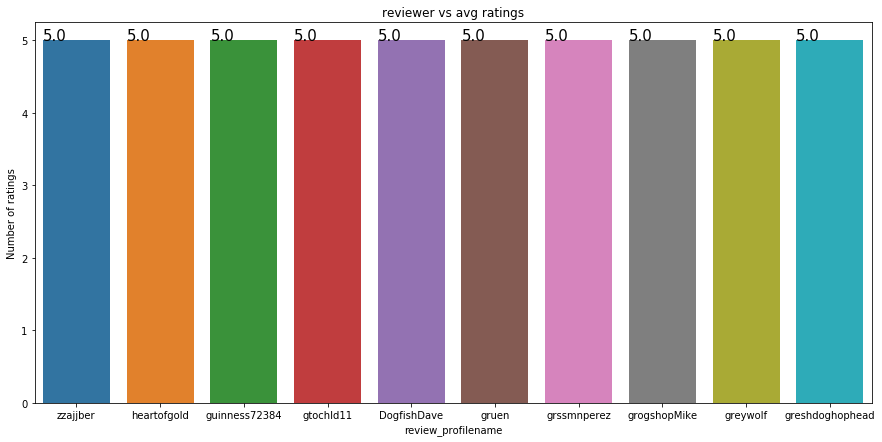

In [34]:
plt.figure(figsize = (15,7))
avg_rating_reviewer_df = reccom_df.groupby('review_profilename').mean().sort_values('review_overall',ascending = False).reset_index().head(10)
ax_1 = sns.barplot(x = 'review_profilename', y = 'review_overall', data = avg_rating_reviewer_df, order = avg_rating_reviewer_df['review_profilename'])
for i in ax_1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax_1.text(i.get_x()-0, i.get_height()+0, \
            str(round((i.get_height()), 2)), fontsize=15, color='black',
                rotation=0)

plt.xlabel('review_profilename')
plt.ylabel('Number of ratings')
plt.title('reviewer vs avg ratings')

plt.show()


## Average ratings given by reviewers.

In [35]:
beers = reccom_df.groupby('beer_beerid')['review_overall'].count().reset_index()
beers.count()

beers = beers.sort_values('review_overall', ascending=False)

beers_count = beers[beers.review_overall >= 50]
beers_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 1574 to 39270
Data columns (total 2 columns):
beer_beerid       2064 non-null int64
review_overall    2064 non-null int64
dtypes: int64(2)
memory usage: 48.4 KB


In [36]:
beers_count.head()

,beer_beerid,review_overall
1574,2093,977
338,412,966
1427,1904,902
818,1093,840
78,92,812


In [37]:
reviewers = reccom_df.groupby('review_profilename')['review_overall'].count().reset_index()
reviewers_count = reviewers[reviewers.review_overall >= 30]

reviewers_count = reviewers_count.sort_values('review_overall', ascending=False)

reviewers_count.head(5)

,review_profilename,review_overall
18188,northyorksammy,1842
17373,mikesgroove,1373
1629,BuckeyeNation,1336
8470,Thorpe429,1072
1910,ChainGangGuy,1046


## Creating new dataframe with beer_id reviews >= 50 and users reviews >= 30 

In [38]:
filtered_df = reccom_df.merge(beers_count,how='inner',on='beer_beerid')
filtered_df= filtered_df.merge(reviewers_count,how='inner',on='review_profilename')

In [39]:
filtered_df.head()

,beer_beerid,review_profilename,review_overall_x,review_overall_y,review_overall
0,436,Brent,3.0,127,518
1,10784,Brent,4.0,119,518
2,16074,Brent,4.0,431,518
3,33644,Brent,4.0,261,518
4,1122,Brent,5.0,54,518


In [40]:
## Renaming columns
filtered_df.rename(columns={'review_overall_x' : 'beer_rating','review_overall_y':'beers_reviews',
                           'review_overall' : 'users_reviews'},
                  inplace = True)

In [41]:
filtered_df.head()

,beer_beerid,review_profilename,beer_rating,beers_reviews,users_reviews
0,436,Brent,3.0,127,518
1,10784,Brent,4.0,119,518
2,16074,Brent,4.0,431,518
3,33644,Brent,4.0,261,518
4,1122,Brent,5.0,54,518


In [42]:
filtered_df.beer_rating.value_counts(ascending=True)

1.0     1120
1.5     1343
2.0     4474
2.5     7012
5.0    13081
3.0    21189
3.5    42543
4.5    51086
4.0    88240
Name: beer_rating, dtype: int64

In [43]:
# Visualise the rating values and notice:
# The average beer ratings :

beer_ratings_avg = filtered_df.groupby('beer_beerid')['beer_rating'].agg(['mean']).reset_index()

beer_ratings_avg.sort_values(by='mean',ascending=False)[:10]

,beer_beerid,mean
1136,16814,4.636364
499,1545,4.603571
1545,36316,4.602564
1237,21690,4.594697
985,7971,4.567568
371,1062,4.547945
2019,64228,4.533333
318,857,4.527108
1808,47658,4.519380
272,731,4.508216


#### Top 10 beers which got highest average rating.

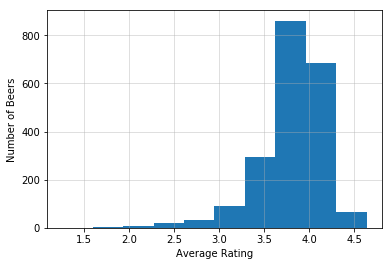

In [44]:
plt.hist(beer_ratings_avg['mean'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Rating')
plt.ylabel('Number of Beers')
plt.show()

In [45]:
# Visualise the rating values and notice:
# The average user ratings :

user_ratings_avg = filtered_df.groupby('review_profilename')['beer_rating'].agg(['mean']).reset_index()

user_ratings_avg.sort_values(by='mean',ascending=False)[:10]

,review_profilename,mean
1400,aglose45,4.456522
440,EssexAleMan,4.456522
1858,doopiedoopiedoo,4.444444
434,EnojysAnyBeer,4.435780
773,Lukie,4.423077
2238,joshuaseresse,4.416667
187,Birdiebeagle,4.414286
2556,noelcb,4.411290
921,OldSock,4.406250
2567,nsmit17,4.405660


#### Top 10 customesr who gave max avg rating.

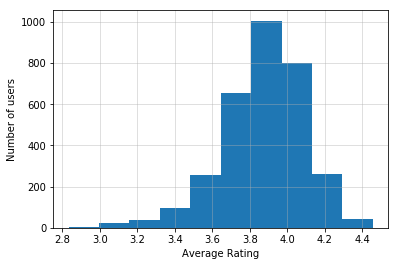

In [46]:
plt.hist(user_ratings_avg['mean'], bins=10)
plt.grid(axis='x', alpha=0.50)
plt.grid(axis='y', alpha=0.50)
plt.xlabel('Average Rating')
plt.ylabel('Number of users')
plt.show()

#### usually users give ratings between 3.5-4.4

In [47]:
user_beer_ratings_avg = filtered_df.groupby('review_profilename')['beers_reviews'].agg(['mean']).reset_index()

user_beer_ratings_avg.sort_values(by='mean',ascending=False)[:10]

,review_profilename,mean
2208,jmfc8237,499.681818
2020,goalie33,463.975610
2287,kdoc8,439.437500
1639,brsett,427.090909
1065,Running4beer,426.920000
2604,originalsin,421.818182
656,Jdiddy,418.350000
2237,joshuadlight,417.300000
2054,haddon,416.177778
1918,elmore,414.400000


In [48]:
filtered_df.shape

(230088, 5)

# Recommendation Model.

In [49]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(filtered_df , test_size = 0.30 , random_state=31)

In [50]:
print(train.shape)
print(test.shape)

(161061, 5)
(69027, 5)


In [51]:
df_beer_features = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
).fillna(0)

In [52]:
df_beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,3.5,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Copy train and test dataset.

These dataset will be used for prediction and evaluation.

Dummy train will be used later for prediction of the beers which has not been rated by the user. To ignore the beers rated by the user, we will mark it as 0 during prediction. The beers not rated by user is marked as 1 for prediction.
Dummy test will be used for evaluation. To evaluate, we will only make prediction on the beers rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [53]:
dummy_train =  train.copy()
dummy_test = test.copy()

In [54]:
dummy_train['beer_rating'] = dummy_train['beer_rating'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['beer_rating'] = dummy_test['beer_rating'].apply(lambda x: 1 if x>=1 else 0)

In [55]:
dummy_train = dummy_train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
).fillna(1)

# The movies not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot(
     index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
).fillna(0)


In [56]:
dummy_train.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100floods,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1759Girl,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1fastz28,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [57]:
dummy_test.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## User Similarity matrix

### Cosine similarity

In [58]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.         0.0602183  ... 0.         0.         0.        ]
 [0.         1.         0.10346685 ... 0.03699533 0.0236273  0.        ]
 [0.0602183  0.10346685 1.         ... 0.0406859  0.04209458 0.        ]
 ...
 [0.         0.03699533 0.0406859  ... 1.         0.         0.        ]
 [0.         0.0236273  0.04209458 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [59]:
user_correlation.shape

(3176, 3176)

## Using adjusted cosine

### Here, not removing the Nan values and calculating the mean only for the beer rated  by the user.

In [60]:
beer_features  = train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
)

In [61]:
beer_features.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,3.5,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the beers rating for each user aroun 0 mean.

In [62]:
mean = np.nanmean(beer_features,axis=1)
df_normalized= (beer_features.T-mean).T

In [63]:
df_normalized.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1fastz28,NaN,-0.414286,NaN,0.085714,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-0.414286,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Finding Cosine Similarity.

In [64]:
from sklearn.metrics.pairwise import pairwise_distances

user_correlation = 1-pairwise_distances(df_normalized.fillna(0),metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.          0.         -0.06414558 ...  0.          0.
   0.        ]
 [ 0.          1.         -0.00228504 ... -0.05790255  0.06023922
   0.        ]
 [-0.06414558 -0.00228504  1.         ... -0.03519429  0.00183073
   0.        ]
 ...
 [ 0.         -0.05790255 -0.03519429 ...  1.          0.
   0.        ]
 [ 0.          0.06023922  0.00183073 ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


## Prediction 

Predicting for the users which are positively related with other users as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0,which shows negative correlation.

In [65]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.06023922,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.00183073,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.06023922, 0.00183073, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

#### Rating predicted by the user(for beers rated as well as not rated) is the weighted sum of 
#### correlattions with the beer rating

In [66]:
predited_user_rating = np.dot(user_correlation , beer_features.fillna(0))
predited_user_rating

array([[0.60740569, 1.72279843, 1.36537555, ..., 0.62420766, 2.78695303,
        0.99231436],
       [1.64187597, 2.19901147, 0.68375015, ..., 0.77148987, 2.04906253,
        0.87085684],
       [0.50868217, 1.82480268, 1.04838097, ..., 0.4432223 , 1.66992617,
        1.01367289],
       ...,
       [5.4615181 , 9.28403854, 6.24694338, ..., 1.13753439, 2.05371077,
        2.43409095],
       [1.94987669, 7.03871264, 4.32649666, ..., 1.48588393, 3.63541061,
        2.413668  ],
       [2.79919408, 5.30058669, 4.10148393, ..., 0.7447872 , 1.28456455,
        1.13771762]])

In [67]:
predited_user_rating.shape

(3176, 2064)

Since we are interested only in the beers not rated by the user, 
we will ignore the beers rated by the user by making it zero. 

In [68]:
user_final_rating = np.multiply(predited_user_rating,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.607406,1.722798,1.365376,2.133627,0.369895,0.383252,2.128028,1.836918,2.817660,1.975254,...,3.390042,0.677360,0.326128,0.253216,0.442418,0.547199,0.265393,0.624208,2.786953,0.992314
05Harley,1.641876,2.199011,0.683750,4.119564,1.142683,0.498070,2.202979,2.498159,6.628212,3.453936,...,2.962885,1.561487,1.674791,1.224707,1.361091,0.912850,0.302531,0.771490,2.049063,0.870857
100floods,0.508682,1.824803,1.048381,2.556826,0.508363,0.473822,2.041114,0.524179,4.925649,2.787559,...,2.772751,1.099367,0.921139,0.799246,0.928896,0.406420,0.375718,0.443222,1.669926,1.013673
1759Girl,3.654447,5.765699,5.281095,5.064425,1.357946,1.871067,5.197184,4.365944,13.376856,11.673933,...,8.238620,1.740618,2.625025,1.563181,0.776449,2.044254,0.757676,1.002973,3.981609,2.350628
1fastz28,4.260667,0.000000,4.846008,0.000000,1.676340,2.468645,7.305227,6.270055,17.198941,12.667486,...,6.401570,2.171791,0.000000,2.319006,2.686793,2.116601,1.817929,1.473303,3.677687,3.638288


## Top 10 recommendations for user 1

In [69]:
 user_final_rating.iloc[1].sort_values(ascending=False)[:10]

beer_beerid
7971     13.885626
412      13.780658
1093     12.523484
731      12.490436
4083     12.247701
680      11.927281
1904     11.736744
34       11.679468
19960    11.371069
92       11.303638
Name: 05Harley, dtype: float64

In [70]:
## Similarity between top 10 users
top_10 = user_final_rating.iloc[:10,:10]
top_10

beer_beerid,5,6,7,10,14,15,17,19,30,31
review_profilename,,,,,,,,,,
0110x011,0.607406,1.722798,1.365376,2.133627,0.369895,0.383252,2.128028,1.836918,2.817660,1.975254
05Harley,1.641876,2.199011,0.683750,4.119564,1.142683,0.498070,2.202979,2.498159,6.628212,3.453936
100floods,0.508682,1.824803,1.048381,2.556826,0.508363,0.473822,2.041114,0.524179,4.925649,2.787559
1759Girl,3.654447,5.765699,5.281095,5.064425,1.357946,1.871067,5.197184,4.365944,13.376856,11.673933
1fastz28,4.260667,0.000000,4.846008,0.000000,1.676340,2.468645,7.305227,6.270055,17.198941,12.667486
32hoss32,5.463102,12.542396,8.103772,10.358917,3.220584,3.420030,11.803124,13.588931,20.695294,15.317890
3Vandoo,3.542465,8.935916,6.509780,7.186134,2.922117,2.722449,8.319834,6.465149,15.520371,15.943180
4000qtrap,0.863029,3.192234,2.678842,5.016206,0.555923,1.190761,3.205879,3.104515,7.042174,4.860710
4DAloveofSTOUT,1.031059,2.927596,1.300396,2.913080,1.051519,0.469621,2.239036,2.239323,4.633891,2.483707


In [71]:
## Taking transpose
top_10_trans = top_10.T
top_10_trans

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz
beer_beerid,,,,,,,,,,
5,0.607406,1.641876,0.508682,3.654447,4.260667,5.463102,3.542465,0.863029,1.031059,1.399489
6,1.722798,2.199011,1.824803,5.765699,0.000000,12.542396,8.935916,3.192234,2.927596,3.298513
7,1.365376,0.683750,1.048381,5.281095,4.846008,8.103772,6.509780,2.678842,1.300396,3.264341
10,2.133627,4.119564,2.556826,5.064425,0.000000,10.358917,7.186134,5.016206,2.913080,3.318713
14,0.369895,1.142683,0.508363,1.357946,1.676340,3.220584,2.922117,0.555923,1.051519,1.038088
15,0.383252,0.498070,0.473822,1.871067,2.468645,3.420030,2.722449,1.190761,0.469621,1.649017
17,2.128028,2.202979,2.041114,5.197184,7.305227,11.803124,8.319834,3.205879,2.239036,2.685069
19,1.836918,2.498159,0.524179,4.365944,6.270055,13.588931,6.465149,3.104515,2.239323,3.551101
30,2.817660,6.628212,4.925649,13.376856,17.198941,20.695294,15.520371,7.042174,4.633891,8.617721


In [72]:
top_10_trans.corr(method='pearson')

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz
review_profilename,,,,,,,,,,
0110x011,1.000000,0.826983,0.836336,0.786875,0.584087,0.935757,0.820637,0.937759,0.916493,0.769789
05Harley,0.826983,1.000000,0.916609,0.817613,0.659148,0.848956,0.780358,0.912185,0.930229,0.808542
100floods,0.836336,0.916609,1.000000,0.892129,0.695038,0.836225,0.872343,0.930956,0.903714,0.857482
1759Girl,0.786875,0.817613,0.892129,1.000000,0.850593,0.892964,0.975106,0.878868,0.804835,0.979605
1fastz28,0.584087,0.659148,0.695038,0.850593,1.000000,0.739882,0.790165,0.648851,0.563072,0.848842
32hoss32,0.935757,0.848956,0.836225,0.892964,0.739882,1.000000,0.907143,0.912754,0.922537,0.888501
3Vandoo,0.820637,0.780358,0.872343,0.975106,0.790165,0.907143,1.000000,0.877864,0.810574,0.964511
4000qtrap,0.937759,0.912185,0.930956,0.878868,0.648851,0.912754,0.877864,1.000000,0.924094,0.884601
4DAloveofSTOUT,0.916493,0.930229,0.903714,0.804835,0.563072,0.922537,0.810574,0.924094,1.000000,0.783000


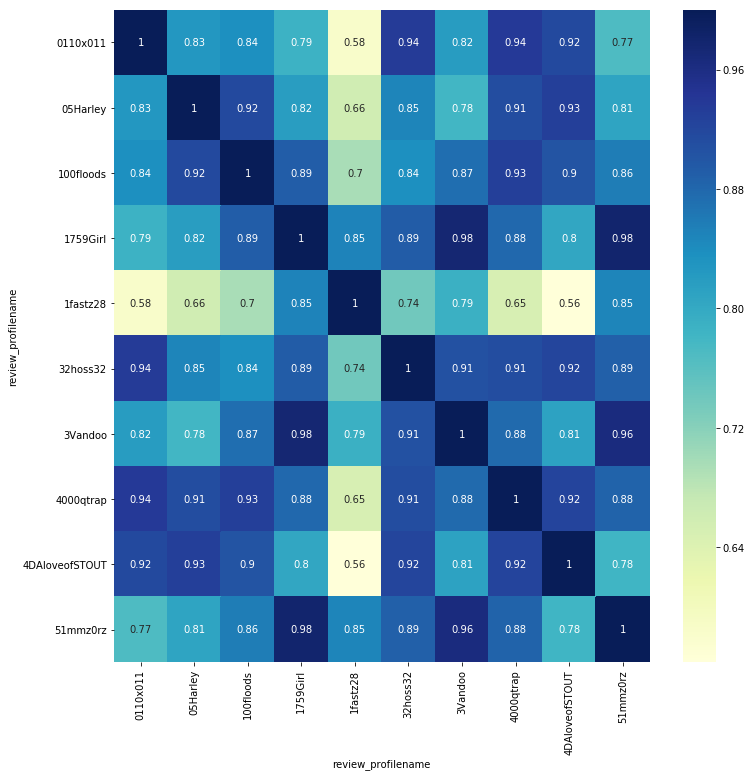

In [73]:
plt.figure(figsize=(12,12))
sns.heatmap(top_10_trans.corr(method='pearson'),annot=True,cmap='YlGnBu')
plt.show()

## Item based similarity.

In [74]:
beer_features =  train.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
).T

In [75]:
beer_features.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted = (beer_features.T-mean).T

In [77]:
df_subtracted.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,-0.209559,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.227273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,0.153226,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cosine Similarity

In [78]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.         -0.04400353  0.10450266 ...  0.          0.01444095
   0.        ]
 [-0.04400353  1.          0.09372582 ...  0.0850787   0.0028846
   0.        ]
 [ 0.10450266  0.09372582  1.         ...  0.0035514   0.00416595
  -0.00307617]
 ...
 [ 0.          0.0850787   0.0035514  ...  1.         -0.00953562
   0.02076853]
 [ 0.01444095  0.0028846   0.00416595 ... -0.00953562  1.
  -0.01370386]
 [ 0.          0.         -0.00307617 ...  0.02076853 -0.01370386
   1.        ]]


filtering  the correlations which are positive 

In [79]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.        , 0.10450266, ..., 0.        , 0.01444095,
        0.        ],
       [0.        , 1.        , 0.09372582, ..., 0.0850787 , 0.0028846 ,
        0.        ],
       [0.10450266, 0.09372582, 1.        , ..., 0.0035514 , 0.00416595,
        0.        ],
       ...,
       [0.        , 0.0850787 , 0.0035514 , ..., 1.        , 0.        ,
        0.02076853],
       [0.01444095, 0.0028846 , 0.00416595, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02076853, 0.        ,
        1.        ]])

## Prediction

In [80]:
ratings_predicted_item = np.dot((beer_features.fillna(0).T),item_correlation)
ratings_predicted_item

array([[0.34235531, 0.75140313, 0.3725019 , ..., 0.4798347 , 0.51727737,
        0.77667071],
       [0.71201797, 0.61201673, 0.74136727, ..., 0.29537101, 0.96046555,
        0.70915081],
       [0.4610979 , 0.57293613, 0.84695463, ..., 0.44862372, 1.62539371,
        1.21536412],
       ...,
       [1.05588008, 1.64889637, 1.67259081, ..., 0.39409505, 0.7575991 ,
        1.69761257],
       [1.05237359, 1.68876966, 1.94192558, ..., 1.24434921, 1.03048876,
        1.72885155],
       [0.77920154, 0.98848806, 1.95106329, ..., 0.22335889, 0.2721665 ,
        0.45937481]])

In [81]:
ratings_predicted_item.shape

(3176, 2064)

In [82]:
dummy_train.shape

(3176, 2064)

### Filtering for the beer not rated by the customer.

In [83]:
final_rating_item = np.multiply(ratings_predicted_item,dummy_train)

In [84]:
final_rating_item.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.342355,0.751403,0.372502,0.373032,0.438093,0.606722,1.266867,0.346784,1.825658,0.633090,...,1.191960,0.412804,0.409965,0.477528,0.291183,0.658500,0.153989,0.479835,0.517277,0.776671
05Harley,0.712018,0.612017,0.741367,0.816150,1.197436,1.189673,0.377426,0.574105,1.825379,0.655822,...,0.852472,0.167492,0.283364,0.594851,0.426807,0.882157,1.132680,0.295371,0.960466,0.709151
100floods,0.461098,0.572936,0.846955,0.399168,0.330429,0.904166,0.991984,0.350883,1.398217,0.663469,...,0.914051,0.767967,1.061601,0.782607,0.977393,0.424092,1.789367,0.448624,1.625394,1.215364
1759Girl,1.030794,1.233836,1.835413,1.391103,0.720516,0.934950,1.466819,0.566264,1.926939,1.461998,...,0.786347,1.258554,1.002897,1.065330,0.618888,0.886222,1.026076,0.433305,1.075807,1.523836
1fastz28,2.173427,0.000000,3.898027,0.000000,3.264602,3.261925,3.998928,2.687456,2.711403,4.235729,...,3.086705,3.051129,0.000000,1.828889,1.196344,1.753731,3.142080,1.587389,1.649391,4.243231


### Top 10 recommendation for 1st user

In [85]:
final_rating_item.iloc[1].sort_values(ascending=False)[:10]

beer_beerid
48194    2.632030
34363    2.451880
33894    2.384289
1504     2.347642
34094    2.344075
7438     2.259103
50176    2.145571
771      2.124598
8919     2.083420
38660    2.073691
Name: 05Harley, dtype: float64

 SImilarity between first 10 beers

In [86]:
beers_top_10 = final_rating_item.iloc[:10,:10]

In [87]:
beers_top_10

beer_beerid,5,6,7,10,14,15,17,19,30,31
review_profilename,,,,,,,,,,
0110x011,0.342355,0.751403,0.372502,0.373032,0.438093,0.606722,1.266867,0.346784,1.825658,0.633090
05Harley,0.712018,0.612017,0.741367,0.816150,1.197436,1.189673,0.377426,0.574105,1.825379,0.655822
100floods,0.461098,0.572936,0.846955,0.399168,0.330429,0.904166,0.991984,0.350883,1.398217,0.663469
1759Girl,1.030794,1.233836,1.835413,1.391103,0.720516,0.934950,1.466819,0.566264,1.926939,1.461998
1fastz28,2.173427,0.000000,3.898027,0.000000,3.264602,3.261925,3.998928,2.687456,2.711403,4.235729
32hoss32,0.555701,1.089635,1.396297,1.516364,1.079436,1.042607,0.977324,0.606880,0.771947,0.924730
3Vandoo,1.076917,1.129220,1.027566,1.623240,2.466679,1.030707,1.227803,1.300322,1.259056,2.756709
4000qtrap,0.504887,1.506075,1.468067,1.167652,0.853308,1.690247,1.013523,0.892992,1.057554,1.249679
4DAloveofSTOUT,0.691417,0.668843,0.684541,0.898537,0.431441,0.628534,1.131348,0.557950,2.930775,1.123848


In [88]:
beers_top_10.corr(method='pearson')

beer_beerid,5,6,7,10,14,15,17,19,30,31
beer_beerid,,,,,,,,,,
5,1.000000,-0.527641,0.895456,-0.301677,0.874808,0.834278,0.885416,0.930841,0.461833,0.940144
6,-0.527641,1.000000,-0.377643,0.828023,-0.378548,-0.458237,-0.561957,-0.474073,-0.652996,-0.389606
7,0.895456,-0.377643,1.000000,-0.309671,0.739887,0.919637,0.907421,0.874353,0.242460,0.825554
10,-0.301677,0.828023,-0.309671,1.000000,-0.122033,-0.444623,-0.527230,-0.326044,-0.519869,-0.197620
14,0.874808,-0.378548,0.739887,-0.122033,1.000000,0.786088,0.720470,0.930358,0.139877,0.928153
15,0.834278,-0.458237,0.919637,-0.444623,0.786088,1.000000,0.837635,0.918424,0.220441,0.803929
17,0.885416,-0.561957,0.907421,-0.527230,0.720470,0.837635,1.000000,0.875386,0.425382,0.852991
19,0.930841,-0.474073,0.874353,-0.326044,0.930358,0.918424,0.875386,1.000000,0.320251,0.965098
30,0.461833,-0.652996,0.242460,-0.519869,0.139877,0.220441,0.425382,0.320251,1.000000,0.330219


## Model Evaluation

### using user similarity

In [89]:
test_beer_features = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[ 1.00000000e+00 -9.94756754e-03  0.00000000e+00 ...  8.12730982e-04
   6.02316422e-02  0.00000000e+00]
 [-9.94756754e-03  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 8.12730982e-04  0.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   3.81129997e-03  0.00000000e+00]
 [ 6.02316422e-02  0.00000000e+00  0.00000000e+00 ...  3.81129997e-03
   1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


In [90]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.41939745, 0.2239049 , 0.79532046, ..., 0.54059044, 2.14354489,
        0.21766579],
       [0.36384749, 0.20596454, 0.60289483, ..., 1.26725901, 0.00927267,
        0.75379087],
       [0.07257225, 0.2557648 , 0.36255464, ..., 0.11783901, 0.15126308,
        0.01956389],
       ...,
       [1.39301769, 3.26215724, 1.17950817, ..., 1.32916552, 0.09780408,
        1.45608938],
       [0.77927749, 0.80168546, 0.31702962, ..., 0.18221054, 0.80894388,
        0.48848761],
       [0.71590046, 1.05053414, 0.59297741, ..., 0.        , 1.08198966,
        0.04651303]])

In [91]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [92]:
test_user_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [94]:
test_df = test.pivot(
    index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
)

In [95]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [96]:
rmse = (sum(sum((test_df - y )**2))/total_non_nan)**0.5
print(rmse)

1.8034893114553268


## By Item Similarity

In [97]:
item_test_beer_features = test.pivot(index='review_profilename',columns='beer_beerid',values = 'beer_rating').T

In [98]:
item_test_beer_features.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
mean = np.nanmean(item_test_beer_features,axis=1)
item_subtracted = (item_test_beer_features.T-mean).T

In [100]:
item_subtracted.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1fastz28,32hoss32,3Vandoo,4000qtrap,4DAloveofSTOUT,51mmz0rz,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
item_test_correlation = 1-pairwise_distances( item_subtracted.fillna(0),metric='cosine')
item_test_correlation[np.isnan(item_test_correlation)] = 0
item_test_correlation[item_test_correlation<0] = 0

In [102]:
item_test_correlation.shape

(2064, 2064)

In [103]:
item_test_predicted_rating  = (np.dot(item_test_correlation,item_test_beer_features.fillna(0))).T
item_test_final_rating = np.multiply(item_test_predicted_rating, dummy_test)
item_test_final_rating.head()

beer_beerid,5,6,7,10,14,15,17,19,30,31,...,72138,73131,74123,74272,74323,74390,74548,74579,74986,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1fastz28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
item_test_df = test.pivot(index='review_profilename',columns='beer_beerid',values='beer_rating')

In [105]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = item_test_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_df_1 = test.pivot(index='review_profilename',
    columns='beer_beerid',
    values='beer_rating'
)
    

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


# RMSE

In [106]:
rmse = (sum(sum((test_df_1 - y )**2))/total_non_nan)**0.5
print(rmse)

2.095085268824015


RMSE value for user based similarity is 1.8 and for item based it is 2.1.
 SO we should go for user based similarity model

##  Recommendation of the names of the top 5 beers to the users 'cokes', 'genog' and 'giblet' using both the models.

### Reccomending thru the user based similarity model

In [107]:
cokes_user = pd.DataFrame(user_final_rating[user_final_rating.index =='cokes']).T
cokes_user.sort_values(by= 'cokes',ascending=False)[:5]

review_profilename,cokes
beer_beerid,
412,30.135874
4083,28.686617
34,28.152674
1708,27.780130
695,27.569453


In [108]:
genog_user = pd.DataFrame(user_final_rating[user_final_rating.index =='genog']).T
genog_user.sort_values(by= 'genog',ascending=False)[:5]

review_profilename,genog
beer_beerid,
412,30.424666
1093,30.370341
131,29.547832
2093,29.526754
1904,27.638449


In [109]:
giblet_user = pd.DataFrame(user_final_rating[user_final_rating.index =='giblet']).T
giblet_user.sort_values(by= 'giblet',ascending=False)[:5]

review_profilename,giblet
beer_beerid,
2093,39.699155
412,38.796605
92,37.226070
355,36.930561
1093,36.117622


### Reccomending thru the item based similarity model

In [110]:
cokes_item = pd.DataFrame(final_rating_item[final_rating_item.index =='cokes']).T
cokes_item.sort_values(by= 'cokes',ascending=False)[:5]

review_profilename,cokes
beer_beerid,
3706,16.673912
20524,14.975975
53899,14.254801
7879,13.773010
30858,13.450961


In [111]:
genog_item = pd.DataFrame(final_rating_item[final_rating_item.index =='genog']).T
genog_item.sort_values(by= 'genog',ascending=False)[:5]

review_profilename,genog
beer_beerid,
10301,6.070267
2361,6.051229
34313,5.725930
36179,5.650048
34484,5.433297


In [112]:
giblet_item = pd.DataFrame(final_rating_item[final_rating_item.index =='giblet']).T
giblet_item.sort_values(by= 'giblet',ascending=False)[:5]

review_profilename,giblet
beer_beerid,
573,3.799396
54413,3.686785
159,3.677000
1075,3.479484
3711,3.376210


## All the recommendations to the users shown.